## Example of MNIST - using Logistic Regression

https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a

In [1]:
%matplotlib inline

In [2]:
import time
import io
import matplotlib.pyplot as plt
import numpy as np
from scipy.io.arff import loadarff

from sklearn.datasets import get_data_home
from sklearn.externals.joblib import Memory
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
try:
    from urllib.request import urlopen
except ImportError:
    # Python 2
    from urllib2 import urlopen

In [3]:
#print(__doc__)

------------------------
Logistic Regression     
------------------------
------------------------
X.shape:  (70000, 784)
y.shape:  (70000,)
------------------------
X.shape:  (70000, 784)
y.shape:  (70000,)
------------------------
X_train:  (60000, 784)
X_test:  (10000, 784)
--------------------------------------
Sparsity with L1 penalty   : 92.47%
Test score with L1 penalty : 0.8329
Example run in             : 104.164 s


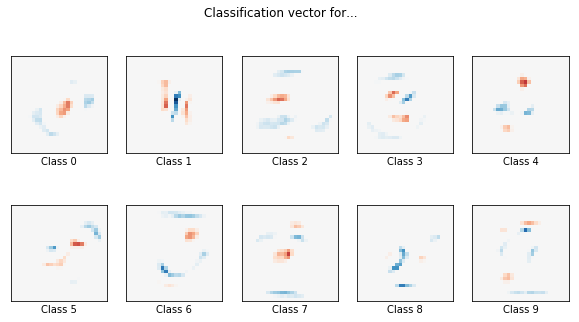

------------------------
the end
------------------------


In [7]:
print("------------------------")
print("Logistic Regression     ")
print("------------------------")

# Author: Arthur Mensch <arthur.mensch@m4x.org>
# License: BSD 3 clause

# Turn down for faster convergence
t0 = time.time()
#train_samples = 5000
train_samples = 60000

memory = Memory(get_data_home())


@memory.cache()
def fetch_mnist():
    content = urlopen(
        'https://www.openml.org/data/download/52667/mnist_784.arff').read()
    data, meta = loadarff(io.StringIO(content.decode('utf8')))
    data = data.view([('pixels', '<f8', 784), ('class', '|S1')])
    return data['pixels'], data['class']

X, y = fetch_mnist()
print("------------------------")
print("X.shape: ", X.shape)
print("y.shape: ", y.shape)

random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

print("------------------------")
print("X.shape: ", X.shape)
print("y.shape: ", y.shape)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_samples, test_size=10000)

print("------------------------")
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Turn up tolerance for faster convergence
clf = LogisticRegression(C=50. / train_samples,
                         multi_class='multinomial',
                         penalty='l1', solver='saga', tol=0.01)
clf.fit(X_train, y_train)
sparsity = np.mean(clf.coef_ == 0) * 100
score = clf.score(X_test, y_test)


#print('Best C % .4f' % clf.C_)
print("--------------------------------------")
print("Sparsity with L1 penalty   : %.2f%%" % sparsity)
print("Test score with L1 penalty : %.4f" % score)

coef = clf.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(coef[i].reshape(28, 28), interpolation='nearest',
                   cmap=plt.cm.RdBu, vmin=-scale, vmax=scale)
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel('Class %i' % i)
plt.suptitle('Classification vector for...')

run_time = time.time() - t0
print('Example run in             : %.3f s' % run_time)
plt.show()

print("------------------------")
print("the end")
print("------------------------")